In [71]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pathlib import Path

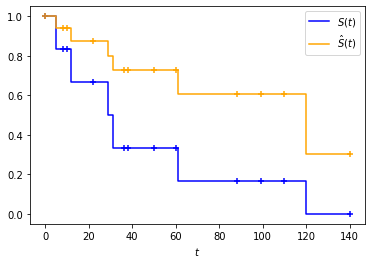

In [84]:
input_file = Path("surv_data1.txt")
df = pd.read_csv("surv_data1.txt", sep=" ")
time = df["Days"]
event = df["Event"]
survival = 1 - event.cumsum() / event.sum()
at_risk = np.arange(event.count(), 0, -1)
km = np.cumprod(1 - event / at_risk)

plt.step(time, survival, where="post", c="blue", label="$S(t)$")
plt.scatter(time[event == 0], survival[event == 0], c="blue", marker="+")
plt.step(time, km, where="post", c="orange", label="$\hat{S}(t)$")
plt.scatter(time[event == 0], km[event == 0], c="orange", marker="+")

plt.xlabel("$t$")
plt.legend()

df = pd.DataFrame({
    "time": time,
    "event": event,
    "at_risk": at_risk,
    "survival": survival,
    "km": km,
})
df.to_csv(input_file.with_suffix(".csv"), index=False)